In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#reading the file and check the data
data = pd.read_excel('employment.xlsx')


data.head()

,REF_DATE,GEO,DGUID,Statistics,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2015-01-01,Canada,2016A000011124,Job vacancies,Number,223,units,0,v104272652,1.1,408125.00,E,NaN,NaN,0
1,2015-01-01,Canada,2016A000011124,Payroll employees,Number,223,units,0,v104272653,1.3,14908280.00,D,NaN,NaN,0
2,2015-01-01,Canada,2016A000011124,Job vacancy rate,Percentage,242,units,0,v104272654,1.4,2.70,E,NaN,NaN,1
3,2015-01-01,Canada,2016A000011124,Average offered hourly wage,Dollars,81,units,0,v104272655,1.5,19.15,D,NaN,NaN,2
4,2015-01-01,Newfoundland and Labrador,2016A000210,Job vacancies,Number,223,units,0,v104272656,2.1,NaN,F,NaN,NaN,0


# Data Inspection and loading the data to a pandas DataFrame

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11072 entries, 0 to 11071
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   REF_DATE       11072 non-null  datetime64[ns]
 1   GEO            11072 non-null  object        
 2   DGUID          10176 non-null  object        
 3   Statistics     11072 non-null  object        
 4   UOM            11072 non-null  object        
 5   UOM_ID         11072 non-null  int64         
 6   SCALAR_FACTOR  11072 non-null  object        
 7   SCALAR_ID      11072 non-null  int64         
 8   VECTOR         11072 non-null  object        
 9   COORDINATE     11072 non-null  float64       
 10  VALUE          10979 non-null  float64       
 11  STATUS         11072 non-null  object        
 12  SYMBOL         0 non-null      float64       
 13  TERMINATED     448 non-null    object        
 14  DECIMALS       11072 non-null  int64         
dtypes: datetime64[ns](1

In [88]:
df = data[['REF_DATE','GEO','Statistics','UOM','VALUE','STATUS']]
df

,REF_DATE,GEO,Statistics,UOM,VALUE,STATUS
0,2015-01-01,Canada,Job vacancies,Number,408125.00,E
1,2015-01-01,Canada,Payroll employees,Number,14908280.00,D
2,2015-01-01,Canada,Job vacancy rate,Percentage,2.70,E
3,2015-01-01,Canada,Average offered hourly wage,Dollars,19.15,D
4,2015-01-01,Newfoundland and Labrador,Job vacancies,Number,NaN,F
...,...,...,...,...,...,...
11067,2023-04-01,Nunavut,Average offered hourly wage,Dollars,30.35,A
11068,2023-04-01,Nunavut,Job vacancies,Number,700.00,C
11069,2023-04-01,Nunavut,Payroll employees,Number,15890.00,A
11070,2023-04-01,Nunavut,Job vacancy rate,Percentage,4.20,C


In [89]:
# store the record initial record count

initial_count = len(df)

In [90]:
df.columns = df.columns.str.lower()
df.columns = ['date','location','type','units','value','collected_data_quality']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11072 entries, 0 to 11071
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    11072 non-null  datetime64[ns]
 1   location                11072 non-null  object        
 2   type                    11072 non-null  object        
 3   units                   11072 non-null  object        
 4   value                   10979 non-null  float64       
 5   collected_data_quality  11072 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 519.1+ KB


# Exploratory Data Analysis

`Collected Data Quality - Graded as per original collection agency`

- A - Excellent	
- B - Very Good
- C - Good
- D - Acceptable
- E - Use With Caution
- F - Too Unreliable to be published



### Checking for Missing Values

In [91]:
df.isnull().sum()

date                       0
location                   0
type                       0
units                      0
value                     93
collected_data_quality     0
dtype: int64

In [92]:
df.loc[df['value'].isnull()]['collected_data_quality'].value_counts()

F    93
Name: collected_data_quality, dtype: int64

Found 93 missing values in the value column, upon analysis we can see that they are related to the data points with data quality as **F - Too Unreliable to be published**.

`We have exclused those rows from our analysis as the data quality is too unreliable to be published.`

In [93]:
#exclusion of missing values
df = df.loc[df['value'].notna()]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10979 entries, 0 to 11071
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    10979 non-null  datetime64[ns]
 1   location                10979 non-null  object        
 2   type                    10979 non-null  object        
 3   units                   10979 non-null  object        
 4   value                   10979 non-null  float64       
 5   collected_data_quality  10979 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 600.4+ KB


In [94]:
# record count after removing missing values.
missing_removed_count = len(df)

In [95]:
# exclusion of data values with Data quality category E, as those are Graded with status as 'use with caution'

df = df[df['collected_data_quality'] !='E']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10770 entries, 1 to 11071
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    10770 non-null  datetime64[ns]
 1   location                10770 non-null  object        
 2   type                    10770 non-null  object        
 3   units                   10770 non-null  object        
 4   value                   10770 non-null  float64       
 5   collected_data_quality  10770 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 589.0+ KB


`We have excluded rows labeled 'E' in the date quality field due to their 'use with caution' status. This accounts for only 209 rows, approximately 1.9% of the total dataset`

In [96]:
# record count after removing rows with Data quality 'E'.
dataquality_removed_count = len(df)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10770 entries, 1 to 11071
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   date                    10770 non-null  datetime64[ns]
 1   location                10770 non-null  object        
 2   type                    10770 non-null  object        
 3   units                   10770 non-null  object        
 4   value                   10770 non-null  float64       
 5   collected_data_quality  10770 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 589.0+ KB


In [98]:
#check for duplicate row count
df.duplicated().sum()

498

In [99]:
#remove duplicated rows from our data
df.drop_duplicates(inplace=True)

In [100]:
finalCountDuplicates = len(df)

In [101]:
#creating another column to help subset data based on location type
df['location_type'] = df['location'].apply(
    lambda x: 'Country' if x.lower() == 'canada' else 
              ('Economic Region' if ',' in x else 'Province')
)

# Display the DataFrame to verify the results
df[['location', 'location_type']]

,location,location_type
1,Canada,Country
3,Canada,Country
21,"South Coast-Burin Peninsula, Newfoundland and ...",Economic Region
24,"Notre Dame-Central Bonavista Bay, Newfoundland...",Economic Region
25,"Notre Dame-Central Bonavista Bay, Newfoundland...",Economic Region
...,...,...
11059,Northwest Territories,Province
11064,Nunavut,Province
11065,Nunavut,Province
11066,Nunavut,Province


In [102]:
plot_info = df['location_type'].value_counts().reset_index()

In [103]:
## final count of data selected for the analysis purpose
df_final = df[df['location_type'] == 'Province']

final_count = len(df_final)

### Descriptive Statistics

#### Object columns

In [104]:
df_final.describe(include='O')

,location,type,units,collected_data_quality,location_type
count,1627,1627,1627,1627,1627
unique,13,4,3,4,1
top,Quebec,Payroll employees,Number,A,Province
freq,128,410,815,1253,1627


#### Number columns

In [105]:
with pd.option_context('display.float_format', '{:.2f}'.format):
    summary = df_final.describe()
    print(summary)

           value
count    1627.00
mean   319398.65
std   1031572.77
min         1.40
25%        14.05
50%       250.00
75%     60505.00
max   6625010.00


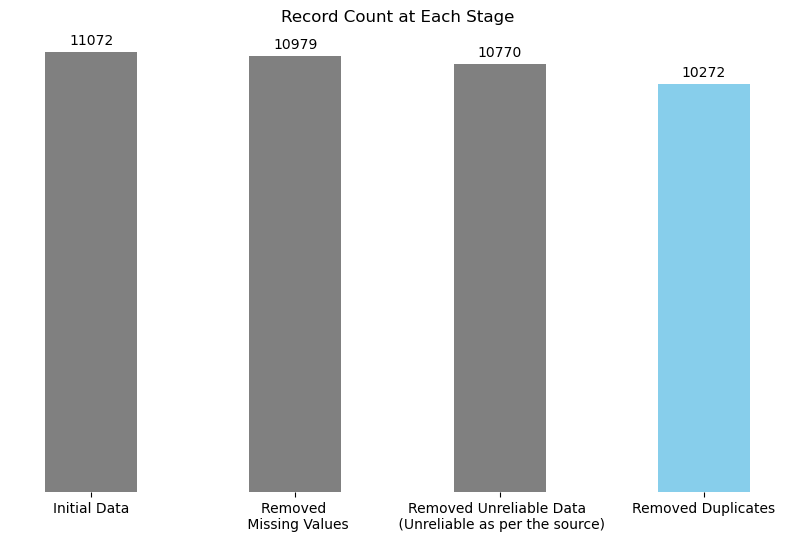

In [106]:
import matplotlib.pyplot as plt

stages = ['Initial Data', f'Removed \n Missing Values', f'Removed Unreliable Data \n (Unreliable as per the source)',f'Removed Duplicates']
record_counts = [initial_count, missing_removed_count, dataquality_removed_count,finalCountDuplicates]

# Bar chart with narrower bars
bar_width = 0.45  # Adjust the width as needed
colors = ['grey', 'grey', 'grey','skyblue']  # Specify colors for bars

plt.figure(figsize=(10,6))
bars = plt.bar(stages, record_counts, color=colors, width=bar_width)

# Adding values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.annotate(f'{yval}',
                 (bar.get_x() + bar.get_width() / 2, yval),
                 va='bottom',  # vertical alignment
                 ha='center',  # horizontal alignment
                 xytext=(0, 3),  # 3 points vertical offset
                 textcoords='offset points')

# Remove spines (borders)
for spine in plt.gca().spines.values():
    spine.set_visible(False)

plt.title('Record Count at Each Stage')
plt.yticks([])

plt.show()


In [107]:
# # Bar chart with narrower bars
# bar_width = 0.45
# colors = ['grey','skyblue','grey']
# bars = plt.bar(plot_info['location_type'],plot_info['count'], color=colors, width=bar_width)

# # Adding values on top of the bars
# for bar in bars:
#     yval = bar.get_height()
#     plt.annotate(f'{yval}',
#                  (bar.get_x() + bar.get_width() / 2, yval),
#                  va='bottom',  # vertical alignment
#                  ha='center',  # horizontal alignment
#                  xytext=(0, 3),  # 3 points vertical offset
#                  textcoords='offset points')

# # Remove spines (borders)
# for spine in plt.gca().spines.values():
#     spine.set_visible(False)

# # Remove y-axis ticks
# plt.yticks([])

# plt.title('Record Count for Location Type')
# # Display the plot without axis labels, title, y-axis ticks, or borders
# plt.show()


In [108]:
df_final = df_final.drop(['location_type','collected_data_quality'],axis=1).reset_index(drop=True)
df_final

,date,location,type,units,value
0,2015-01-01,New Brunswick,Payroll employees,Number,274070.00
1,2015-01-01,New Brunswick,Average offered hourly wage,Dollars,16.75
2,2015-01-01,Quebec,Job vacancies,Number,60505.00
3,2015-01-01,Quebec,Payroll employees,Number,3281125.00
4,2015-01-01,Quebec,Job vacancy rate,Percentage,1.80
...,...,...,...,...,...
1622,2023-04-01,Northwest Territories,Average offered hourly wage,Dollars,34.35
1623,2023-04-01,Nunavut,Job vacancies,Number,700.00
1624,2023-04-01,Nunavut,Payroll employees,Number,15890.00
1625,2023-04-01,Nunavut,Job vacancy rate,Percentage,4.20


In [109]:
df_vacancies = df_final[df_final['type'] == 'Job vacancies']
df_payroll = df_final[df_final['type'] == 'Payroll employees']
df_wages = df_final[df_final['type'] == 'Average offered hourly wage']

In [110]:
df_final[df_final['type'] == 'Job vacancies']

,date,location,type,units,value
2,2015-01-01,Quebec,Job vacancies,Number,60505.0
9,2015-01-01,Saskatchewan,Job vacancies,Number,14230.0
15,2015-04-01,Newfoundland and Labrador,Job vacancies,Number,5250.0
19,2015-04-01,Prince Edward Island,Job vacancies,Number,1785.0
23,2015-04-01,Nova Scotia,Job vacancies,Number,11710.0
...,...,...,...,...,...
1607,2023-04-01,Alberta,Job vacancies,Number,94145.0
1611,2023-04-01,British Columbia,Job vacancies,Number,132685.0
1615,2023-04-01,Yukon,Job vacancies,Number,1330.0
1619,2023-04-01,Northwest Territories,Job vacancies,Number,1365.0


In [111]:
df_vacancies

,date,location,type,units,value
2,2015-01-01,Quebec,Job vacancies,Number,60505.0
9,2015-01-01,Saskatchewan,Job vacancies,Number,14230.0
15,2015-04-01,Newfoundland and Labrador,Job vacancies,Number,5250.0
19,2015-04-01,Prince Edward Island,Job vacancies,Number,1785.0
23,2015-04-01,Nova Scotia,Job vacancies,Number,11710.0
...,...,...,...,...,...
1607,2023-04-01,Alberta,Job vacancies,Number,94145.0
1611,2023-04-01,British Columbia,Job vacancies,Number,132685.0
1615,2023-04-01,Yukon,Job vacancies,Number,1330.0
1619,2023-04-01,Northwest Territories,Job vacancies,Number,1365.0


In [112]:
df_vacancies = df_vacancies.drop(['type','units'],axis=1)
df_vacancies.rename(columns={'value' : 'job_vacancies_number'},inplace = True)
df_vacancies

,date,location,job_vacancies_number
2,2015-01-01,Quebec,60505.0
9,2015-01-01,Saskatchewan,14230.0
15,2015-04-01,Newfoundland and Labrador,5250.0
19,2015-04-01,Prince Edward Island,1785.0
23,2015-04-01,Nova Scotia,11710.0
...,...,...,...
1607,2023-04-01,Alberta,94145.0
1611,2023-04-01,British Columbia,132685.0
1615,2023-04-01,Yukon,1330.0
1619,2023-04-01,Northwest Territories,1365.0


In [113]:
df_payroll = df_payroll.drop(['type','units'],axis=1) 
df_payroll.rename(columns={'value' : 'payroll_employees_number'},inplace = True)
df_payroll

,date,location,payroll_employees_number
0,2015-01-01,New Brunswick,274070.0
3,2015-01-01,Quebec,3281125.0
6,2015-01-01,Ontario,5709625.0
8,2015-01-01,Manitoba,553115.0
10,2015-01-01,Saskatchewan,462365.0
...,...,...,...
1608,2023-04-01,Alberta,2020890.0
1612,2023-04-01,British Columbia,2399060.0
1616,2023-04-01,Yukon,18560.0
1620,2023-04-01,Northwest Territories,22070.0


In [114]:
df_wages = df_wages.drop(['type','units'],axis=1) 
df_wages.rename(columns={'value' : 'avg_wage_rate_dollars'},inplace = True)
df_wages

,date,location,avg_wage_rate_dollars
1,2015-01-01,New Brunswick,16.75
5,2015-01-01,Quebec,19.60
7,2015-01-01,Ontario,18.95
12,2015-01-01,Saskatchewan,19.95
18,2015-04-01,Newfoundland and Labrador,17.75
...,...,...,...
1610,2023-04-01,Alberta,25.10
1614,2023-04-01,British Columbia,25.80
1618,2023-04-01,Yukon,28.90
1622,2023-04-01,Northwest Territories,34.35


In [115]:

df_final_combined = pd.merge(df_vacancies, df_payroll, on=['date','location']).merge(df_wages, on=['date','location'])
df_final_combined


,date,location,job_vacancies_number,payroll_employees_number,avg_wage_rate_dollars
0,2015-01-01,Quebec,60505.0,3281125.0,19.60
1,2015-01-01,Saskatchewan,14230.0,462365.0,19.95
2,2015-04-01,Newfoundland and Labrador,5250.0,199790.0,17.75
3,2015-04-01,Prince Edward Island,1785.0,55735.0,13.80
4,2015-04-01,Nova Scotia,11710.0,375895.0,16.25
...,...,...,...,...,...
400,2023-04-01,Alberta,94145.0,2020890.0,25.10
401,2023-04-01,British Columbia,132685.0,2399060.0,25.80
402,2023-04-01,Yukon,1330.0,18560.0,28.90
403,2023-04-01,Northwest Territories,1365.0,22070.0,34.35


In [116]:
df_final_combined = df_final_combined.sort_values(by=['date', 'location'], ascending=[True, True]).reset_index(drop=True)
df_final_combined

,date,location,job_vacancies_number,payroll_employees_number,avg_wage_rate_dollars
0,2015-01-01,Quebec,60505.0,3281125.0,19.60
1,2015-01-01,Saskatchewan,14230.0,462365.0,19.95
2,2015-04-01,Alberta,72345.0,1979775.0,19.65
3,2015-04-01,British Columbia,69820.0,1968310.0,17.80
4,2015-04-01,Manitoba,14455.0,559260.0,18.05
...,...,...,...,...,...
400,2023-04-01,Ontario,284025.0,6580290.0,26.05
401,2023-04-01,Prince Edward Island,4100.0,67700.0,21.70
402,2023-04-01,Quebec,202095.0,3832900.0,24.30
403,2023-04-01,Saskatchewan,26385.0,484280.0,23.15


In [117]:
df_final_combined.head(5)


,date,location,job_vacancies_number,payroll_employees_number,avg_wage_rate_dollars
0,2015-01-01,Quebec,60505.0,3281125.0,19.60
1,2015-01-01,Saskatchewan,14230.0,462365.0,19.95
2,2015-04-01,Alberta,72345.0,1979775.0,19.65
3,2015-04-01,British Columbia,69820.0,1968310.0,17.80
4,2015-04-01,Manitoba,14455.0,559260.0,18.05


In [118]:
import pandas as pd
from scipy import stats

# Load your data into a DataFrame (assuming your data is in a CSV file)
df = df_final_combined.copy()

# Calculate the correlation coefficients
correlation_vacancies_payroll = df['job_vacancies_number'].corr(df['payroll_employees_number'])
correlation_vacancies_wages = df['job_vacancies_number'].corr(df['avg_wage_rate_dollars'])
correlation_payroll_wages = df['payroll_employees_number'].corr(df['avg_wage_rate_dollars'])

# Perform hypothesis testing to check for significance
_, p_value_vacancies_payroll = stats.pearsonr(df['job_vacancies_number'], df['payroll_employees_number'])
_, p_value_vacancies_wages = stats.pearsonr(df['job_vacancies_number'], df['avg_wage_rate_dollars'])
_, p_value_payroll_wages = stats.pearsonr(df['payroll_employees_number'], df['avg_wage_rate_dollars'])

# Interpret the results
print(f"Correlation between Job Vacancies and Payroll Employment: {correlation_vacancies_payroll:.2f}")
print(f"Correlation between Job Vacancies and Hourly Wages: {correlation_vacancies_wages:.2f}")
print(f"Correlation between Payroll Employment and Hourly Wages: {correlation_payroll_wages:.2f}")

print()

print(f"P-value for Job Vacancies vs. Payroll Employment: {p_value_vacancies_payroll:.5f}")
print(f"P-value for Job Vacancies vs. Hourly Wages: {p_value_vacancies_wages:.5f}")
print(f"P-value for Payroll Employment vs. Hourly Wages: {p_value_payroll_wages:.5f}")

print()

# Check for statistical significance (assuming a significance level of 0.05)
if p_value_vacancies_payroll < 0.05:
    print("The correlation between Job Vacancies and Payroll Employment is statistically significant.")
else:
    print("The correlation between Job Vacancies and Payroll Employment is not statistically significant.")

if p_value_vacancies_wages < 0.05:
    print("The correlation between Job Vacancies and Hourly Wages is statistically significant.")
else:
    print("The correlation between Job Vacancies and Hourly Wages is not statistically significant.")

if p_value_payroll_wages < 0.05:
    print("The correlation between Payroll Employment and Hourly Wages is statistically significant.")
else:
    print("The correlation between Payroll Employment and Hourly Wages is not statistically significant.")


Correlation between Job Vacancies and Payroll Employment: 0.93
Correlation between Job Vacancies and Hourly Wages: 0.08
Correlation between Payroll Employment and Hourly Wages: 0.00

P-value for Job Vacancies vs. Payroll Employment: 0.00000
P-value for Job Vacancies vs. Hourly Wages: 0.10684
P-value for Payroll Employment vs. Hourly Wages: 0.96725

The correlation between Job Vacancies and Payroll Employment is statistically significant.
The correlation between Job Vacancies and Hourly Wages is not statistically significant.
The correlation between Payroll Employment and Hourly Wages is not statistically significant.


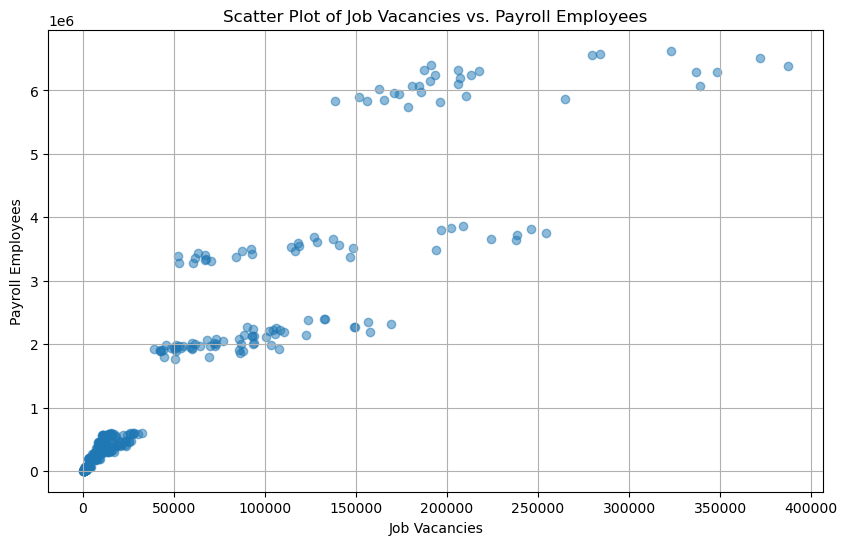

In [119]:
# Extract the relevant columns
job_vacancies = df['job_vacancies_number']
payroll_employees = df['payroll_employees_number']

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
plt.scatter(job_vacancies, payroll_employees, alpha=0.5)  # Create the scatter plot
plt.title('Scatter Plot of Job Vacancies vs. Payroll Employees')  # Set the title
plt.xlabel('Job Vacancies')  # Set the x-axis label
plt.ylabel('Payroll Employees')  # Set the y-axis label
plt.grid(True)  # Add a grid for reference

# Show the plot
plt.show()


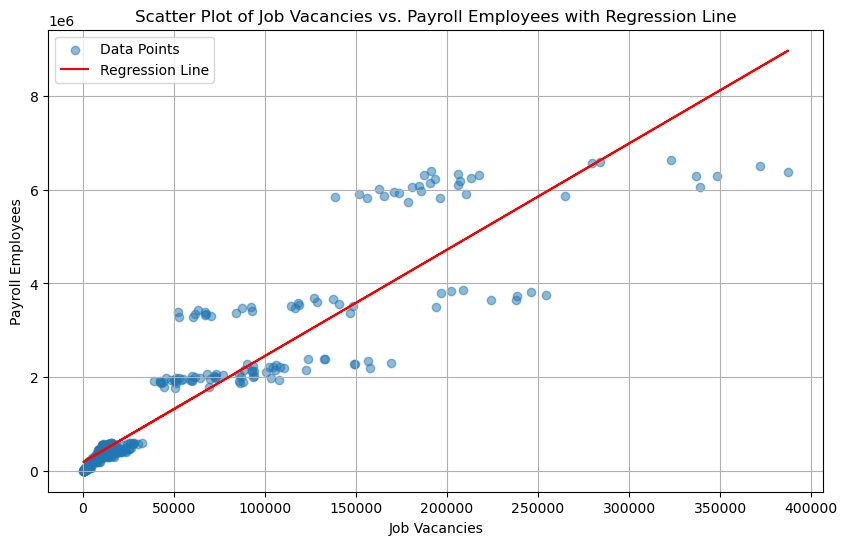

In [120]:
# Extract the relevant columns
job_vacancies = df['job_vacancies_number']
payroll_employees = df['payroll_employees_number']

# Calculate the regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(job_vacancies, payroll_employees)

# Create a scatter plot
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)
plt.scatter(job_vacancies, payroll_employees, alpha=0.5, label='Data Points')  # Create the scatter plot
plt.plot(job_vacancies, intercept + slope * job_vacancies, 'r', label='Regression Line')  # Add the regression line
plt.title('Scatter Plot of Job Vacancies vs. Payroll Employees with Regression Line')  # Set the title
plt.xlabel('Job Vacancies')  # Set the x-axis label
plt.ylabel('Payroll Employees')  # Set the y-axis label
plt.legend()  # Show legend
plt.grid(True)  # Add a grid for reference

# Show the plot
plt.show()


In [121]:
df_final_combined.head()

,date,location,job_vacancies_number,payroll_employees_number,avg_wage_rate_dollars
0,2015-01-01,Quebec,60505.0,3281125.0,19.60
1,2015-01-01,Saskatchewan,14230.0,462365.0,19.95
2,2015-04-01,Alberta,72345.0,1979775.0,19.65
3,2015-04-01,British Columbia,69820.0,1968310.0,17.80
4,2015-04-01,Manitoba,14455.0,559260.0,18.05


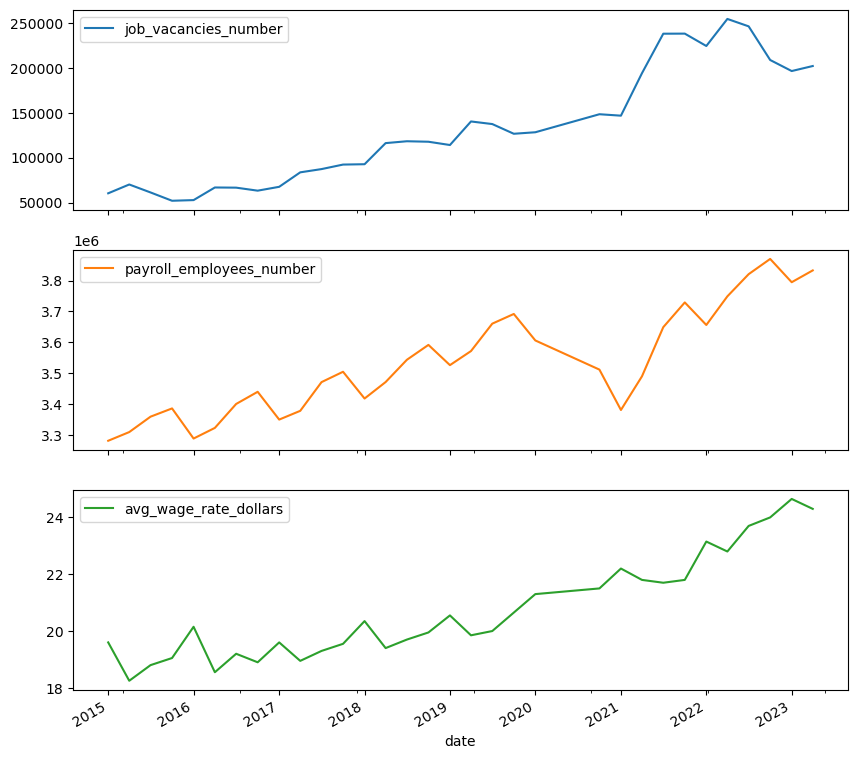

In [122]:
# Convert 'date' column to datetime type
#df['date'] = pd.to_datetime(df['date'])
# Plot time series for a specific province (e.g., Quebec)
quebec_data = df_final_combined[df_final_combined['location'] == 'Quebec']
quebec_data.set_index('date').plot(subplots=True, figsize=(10, 10))
plt.show()


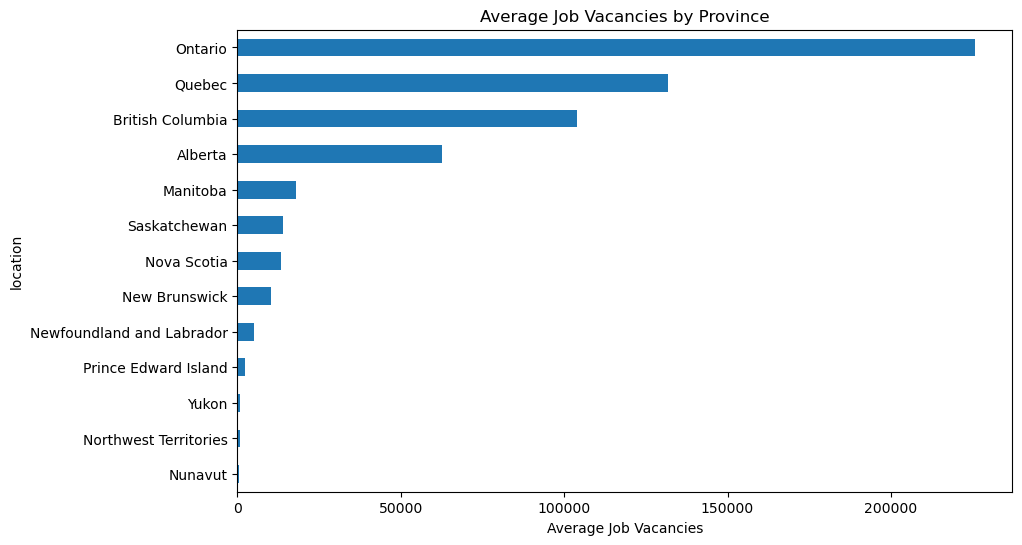

In [123]:
# Compare provinces in terms of average job vacancies
avg_job_vacancies_by_province = df_final_combined.groupby('location')['job_vacancies_number'].mean().sort_values()
avg_job_vacancies_by_province.plot(kind='barh', figsize=(10, 6))
plt.xlabel('Average Job Vacancies')
plt.title('Average Job Vacancies by Province')
plt.show()


Linear Regression Model for predicting job-vacancies:

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

df_ml = df_final_combined.copy()

# Example: Predict job vacancies based on payroll employees
X = df_ml[['payroll_employees_number','avg_wage_rate_dollars']]
y = df_ml['job_vacancies_number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
r_score = model.score(X_train, y_train)
print(f'The r-squared value for the model is {r_score}')
print('')
print(model.intercept_)
model.coef_


Mean Squared Error: 729290159.7599574
The r-squared value for the model is 0.8593741195313792

-28226.88013132417


array([3.89541441e-02, 1.24820754e+03])

`The linear regression equation is:` 
- `job_vacancies_number = 0.0389541441*('payroll_employees_number) + 1248.20754*('avg_wage_rate_dollars') + (-28226.88013132417)`

In [130]:
# Using one-hot encoding to build the model that uses Location as one of the independent variable.
df_ml_onehot = df_final_combined.copy()

df_ml_onehot = pd.get_dummies(df_ml_onehot,columns=['location'],drop_first=True)

# Example: Predict job vacancies based on payroll employees
X = df_ml_onehot.drop(['date','job_vacancies_number'],axis=1)
y = df_ml_onehot['job_vacancies_number']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
r_score = model.score(X_train, y_train)
print(f'The r-squared value for the model is {r_score}')
print('')
print(model.intercept_)
model.coef_


Mean Squared Error: 388094553.298306
The r-squared value for the model is 0.9177467229037751

-383046.2397314748


array([ 2.08838684e-01,  1.95759927e+03, -8.26662481e+03,  2.40911436e+05,
        2.94890423e+05,  3.06851333e+05,  3.26392941e+05,  2.77992970e+05,
        3.21500087e+05, -7.07130121e+05,  3.39602749e+05, -2.62378454e+05,
        2.59489599e+05,  3.37480997e+05])

In [129]:
df_ml_onehot

,date,job_vacancies_number,payroll_employees_number,avg_wage_rate_dollars,location_British Columbia,location_Manitoba,location_New Brunswick,location_Newfoundland and Labrador,location_Northwest Territories,location_Nova Scotia,location_Nunavut,location_Ontario,location_Prince Edward Island,location_Quebec,location_Saskatchewan,location_Yukon
0,2015-01-01,60505.0,3281125.0,19.60,0,0,0,0,0,0,0,0,0,1,0,0
1,2015-01-01,14230.0,462365.0,19.95,0,0,0,0,0,0,0,0,0,0,1,0
2,2015-04-01,72345.0,1979775.0,19.65,0,0,0,0,0,0,0,0,0,0,0,0
3,2015-04-01,69820.0,1968310.0,17.80,1,0,0,0,0,0,0,0,0,0,0,0
4,2015-04-01,14455.0,559260.0,18.05,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,2023-04-01,284025.0,6580290.0,26.05,0,0,0,0,0,0,0,1,0,0,0,0
401,2023-04-01,4100.0,67700.0,21.70,0,0,0,0,0,0,0,0,1,0,0,0
402,2023-04-01,202095.0,3832900.0,24.30,0,0,0,0,0,0,0,0,0,1,0,0
403,2023-04-01,26385.0,484280.0,23.15,0,0,0,0,0,0,0,0,0,0,1,0
